In [19]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sunn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
SCRYPT_RANDOM_SENTENCES = [
    "I love you",
    "You like me",
    "Flowers love sun",
    "I love flowers",
    "Some flowers are red",
    "Some flowers are blue",
    "Sun is yellow",
    "Sun is hot",
    "I like hot coffee",
    "Love is red",
    "Eating potatoes everyday",
    "I like potatoes",
]

In [26]:
# =============================================================================
'''
Simplified tokenizer
A tokenizer is a function that splits a sentence into words
Those words are called tokens
They will be used to create a vector of words

Output:
    scrypt_tokenized_sentences : list of list of tokens
'''

# your implementation


# using nltk
nltk_tokenized_sentences = [word_tokenize(sentence) for sentence in SCRYPT_RANDOM_SENTENCES]

# uncomment to check if your implementation is correct
# assert(scrypt_tokenized_sentences == nltk_tokenized_sentences)
# =============================================================================


In [29]:
# =============================================================================
# Calculating Term Frequency over all sentences
'''
Term Frequency is the number of times a word appears in a sentence
It is used to create a vector of words

Output:
    scrypt_tf : dictionary of word and its frequency
'''

# your implementation


# uncomment to check if your implementation is correct
# assert(scrypt_tf == {'I': 4, 'love': 3, 'you': 1, 'You': 1, 'like': 3, 'me': 1, 'Flowers': 1, 'sun': 1, 'flowers': 3, 'Some': 2, 'are': 2, 'red': 2, 'blue': 1, 'Sun': 2, 'is': 3, 'yellow': 1, 'hot': 2, 'coffee': 1, 'Love': 1, 'Eating': 1, 'potatoes': 2, 'everyday': 1})
            
# =============================================================================

Term Frequency : 
 {'I': 4, 'love': 3, 'you': 1, 'You': 1, 'like': 3, 'me': 1, 'Flowers': 1, 'sun': 1, 'flowers': 3, 'Some': 2, 'are': 2, 'red': 2, 'blue': 1, 'Sun': 2, 'is': 3, 'yellow': 1, 'hot': 2, 'coffee': 1, 'Love': 1, 'Eating': 1, 'potatoes': 2, 'everyday': 1}


In [233]:
# =============================================================================
# TF matrix for all sentences

scrypt_tf_matrix = []
for tokenized_sentence in scrypt_tokenized_sentences:
    tf_vector = []
    for word in scrypt_tf:
        if word in tokenized_sentence:
            tf_vector.append(1)
        else:
            tf_vector.append(0)
    scrypt_tf_matrix.append(tf_vector)
    
print(
    "Shape of TF Matrix : \n",
    np.array(scrypt_tf_matrix).shape
)

assert(np.array(scrypt_tf_matrix).shape == (len(scrypt_tokenized_sentences), len(scrypt_tf))) # Sanity check
    
print(
    "TF Matrix : \n",
    np.array(scrypt_tf_matrix)
)

# =============================================================================


Shape of TF Matrix : 
 (12, 22)
TF Matrix : 
 [[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


In [234]:
# =============================================================================
# Calculating euclidian distance between each words

N_VECTORS = len(scrypt_tokenized_sentences)
N_WORDS = len(scrypt_tf)
distances_between_words = np.zeros((N_WORDS, N_WORDS))

for i in range(N_VECTORS):
    for j in range(i+1, N_VECTORS):
        first_vector = scrypt_tf_matrix[i]
        second_vector = scrypt_tf_matrix[j]
        
        squared_distance = sum((first_vector - second_vector)**2 for first_vector, second_vector in zip(first_vector, second_vector))
        euclidian_distance = np.sqrt(squared_distance)
        
        distances_between_words[i][j] = euclidian_distance
        distances_between_words[j][i] = euclidian_distance
        
print(
    "Distances between words : \n",
    distances_between_words
)

# =============================================================================

Distances between words : 
 [[0.         2.44948974 2.         1.41421356 2.64575131 2.64575131
  2.44948974 2.44948974 2.23606798 2.44948974 2.44948974 2.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [2.44948974 0.         2.44948974 2.44948974 2.64575131 2.64575131
  2.44948974 2.44948974 2.23606798 2.44948974 2.44948974 2.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [2.         2.44948974 0.         2.         2.64575131 2.64575131
  2.44948974 2.44948974 2.64575131 2.44948974 2.44948974 2.44948974
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [1.41421356 2.44948974 2.         0.         2.23606798 2.23606798
  2.44948974 2.44948974 2.23606798 2.44948974 2.44948974 2.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [2.64575131 2.64575131 

In [250]:
# =============================================================================
# Words with most similar meaning

top_3_similar_words = {}

for i in range(len(scrypt_tf.keys())):
    top_3_similar_words[list(scrypt_tf.keys())[i]] = sorted(list(scrypt_tf.keys()), key=lambda x: distances_between_words[i][list(scrypt_tf.keys()).index(x)])[1:3]
    
print(
    "Top 3 similar words for love : \n",
    top_3_similar_words['love']
)
            
# =============================================================================

Top 3 similar words for love : 
 ['blue', 'Sun']


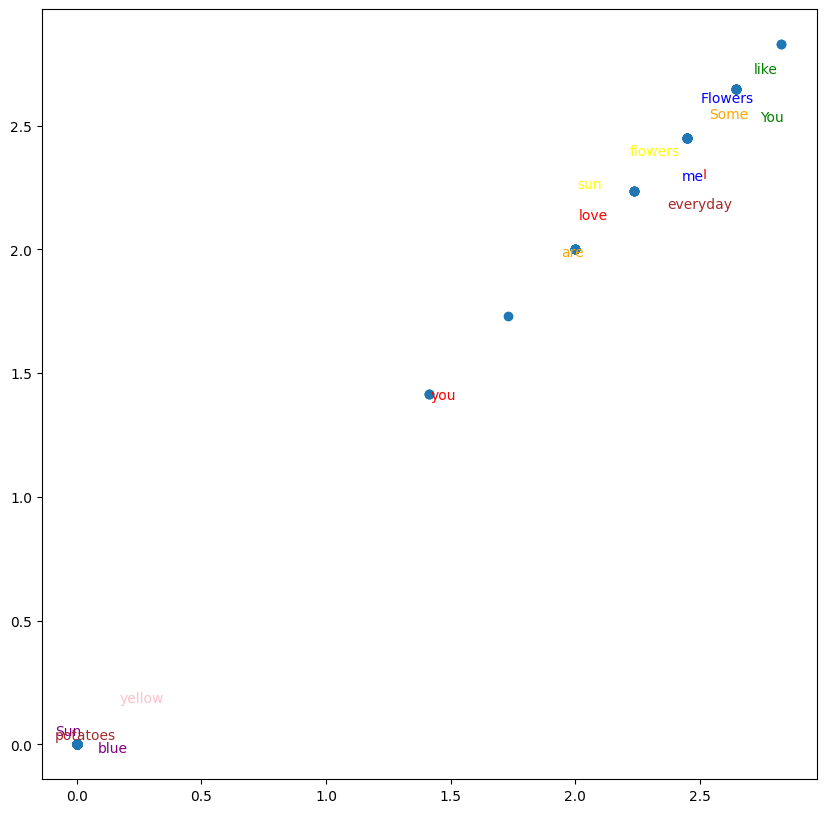

In [245]:
# =============================================================================
# Plotting words in 2D space using euclidian distance only

plot_x = []
plot_y = []
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'black', 'white', 'brown']

for i in range(len(scrypt_tf.keys())):
    for j in range(i+1, len(scrypt_tf.keys())):   
        plot_x.append(distances_between_words[i][j])
        plot_y.append(distances_between_words[j][i])
 

plt.scatter(plot_x, plot_y)
for i, word_name in enumerate(scrypt_tf.keys()):
    plt.annotate(word_name, (plot_x[i] + 0.15*np.random.randn(), plot_y[i] + 0.15*np.random.randn()), color=colors[i*len(colors)//len(scrypt_tf.keys())])
    
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

# =============================================================================

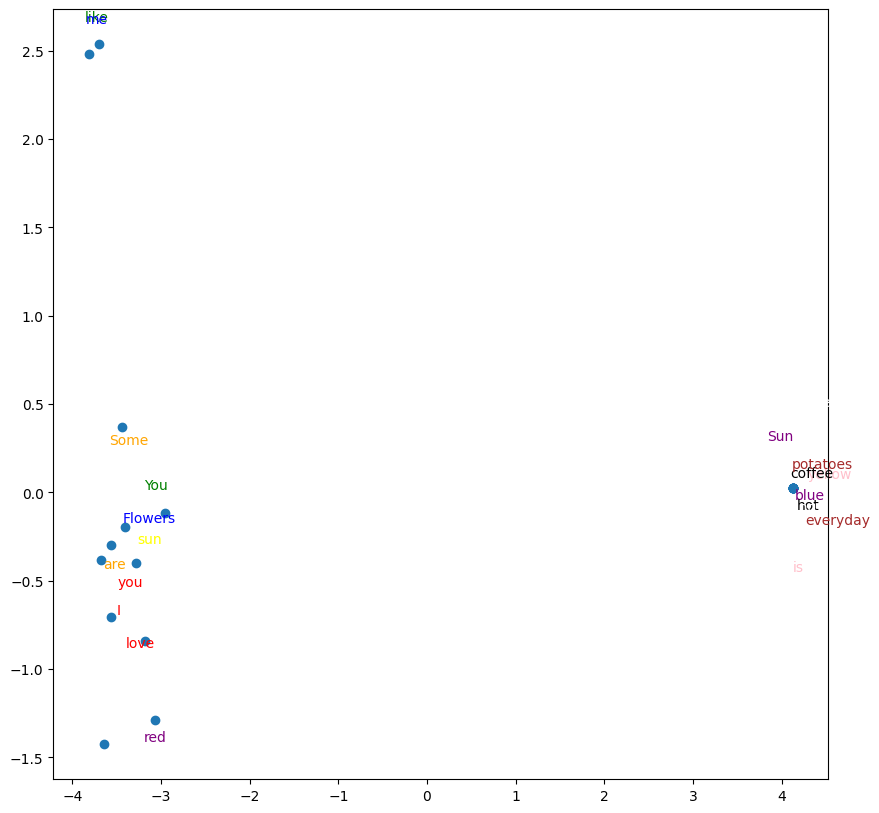

In [244]:
# =============================================================================
# Plotting words in 2D space using PCA on euclidian distance

pca = PCA(n_components=2)
pca.fit(distances_between_words)
pca_distances_between_words = pca.transform(distances_between_words)

plot_x = pca_distances_between_words[:, 0]
plot_y = pca_distances_between_words[:, 1]

plt.scatter(plot_x, plot_y)

for i, word_name in enumerate(scrypt_tf.keys()):
    plt.annotate(word_name, (plot_x[i] + 0.2*np.random.randn(), plot_y[i] + 0.2*np.random.randn()), color=colors[i*len(colors)//len(scrypt_tf.keys())])

plt.rcParams["figure.figsize"] = (10, 10) 
plt.show()

# =============================================================================